## Final Project Submission

Please fill out:
* Student name: Matthew Lipman
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


#### Install Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from statsmodels.formula.api import ols
warnings.filterwarnings('ignore')
%matplotlib inline
import haversine as hs #geographic distance calculator
import statsmodels.api as sm

In [2]:
df_train = pd.read_csv('data/kc_house_data.csv')

In [3]:
df_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

>Categorical Variables: waterfront, condition, grade, yr_built

>Numerical Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors

In [4]:
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


>**Recommended to ignore the following features:** date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living15, and sqft_lot15

### Examination of the variable of interest: 'price'

Distribution appears to deviate slightly from a normal distribution.
Displays a positive skewness.
Skewness: 4.023364652271239
Kurtosis: 34.54135857673376


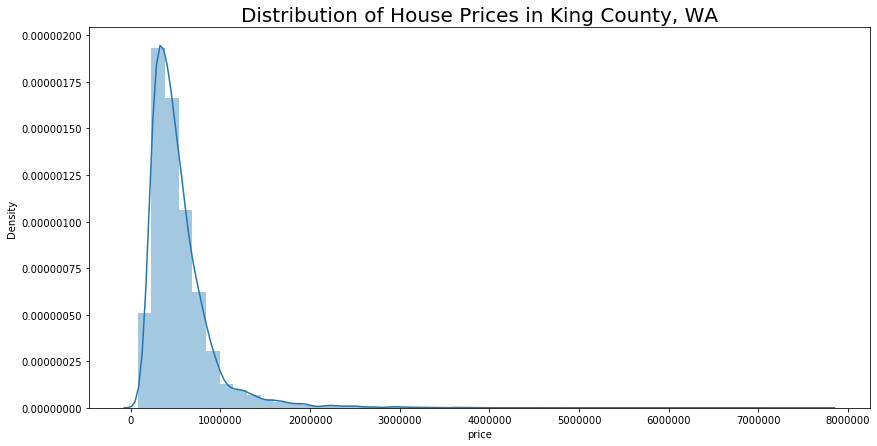

In [5]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['price'])
plt.title("Distribution of House Prices in King County, WA", fontsize=20);
print("Distribution appears to deviate slightly from a normal distribution.")
print("Displays a positive skewness.")
print("Skewness:", df_train['price'].skew())
print("Kurtosis:", df_train['price'].kurt())

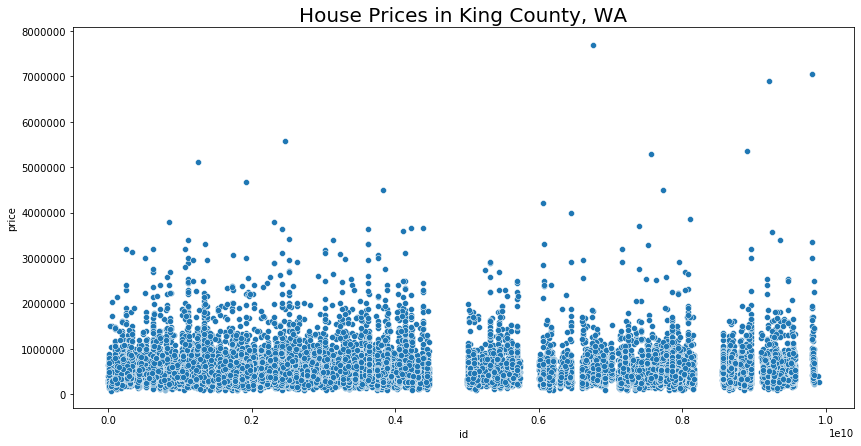

In [6]:
plt.figure(figsize=(14,7))
sns.scatterplot(df_train['id'], df_train['price']),
plt.title("House Prices in King County, WA", fontsize=20);

>**Comment:** Recommended to remove outliers because kurtosis is so high.

### Relationship with numerical variables

##### Scatter plots of "recommended" variables against price

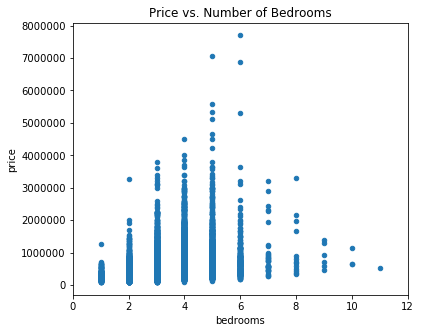

In [7]:
#bedrooms
plot1 = pd.concat([df_train['price'], df_train['bedrooms']], axis=1)
plot1.plot.scatter(x='bedrooms', y='price', figsize=(6,5), xlim=(0,12))
plt.title("Price vs. Number of Bedrooms");

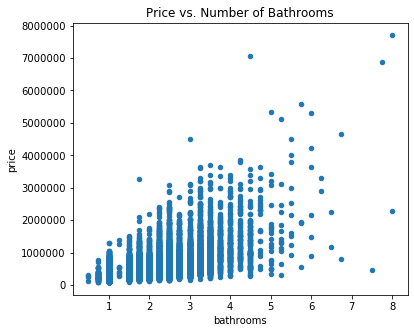

In [8]:
#bathrooms
plot1 = pd.concat([df_train['price'], df_train['bathrooms']], axis=1)
plot1.plot.scatter(x='bathrooms', y='price', figsize=(6,5))
plt.title("Price vs. Number of Bathrooms");

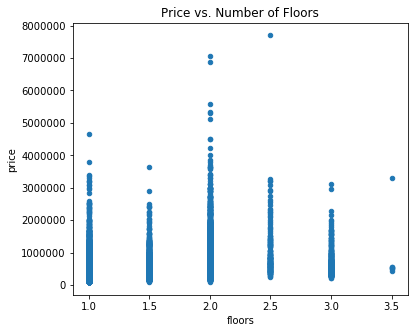

In [9]:
#floors
plot1 = pd.concat([df_train['price'], df_train['floors']], axis=1)
plot1.plot.scatter(x='floors', y='price', figsize=(6,5))
plt.title("Price vs. Number of Floors");

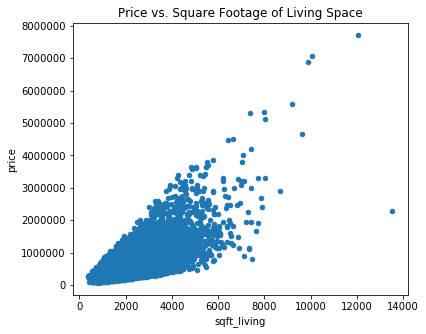

In [10]:
#sqft_living
plot1 = pd.concat([df_train['price'], df_train['sqft_living']], axis=1)
plot1.plot.scatter(x='sqft_living', y='price', figsize=(6,5))
plt.title("Price vs. Square Footage of Living Space");

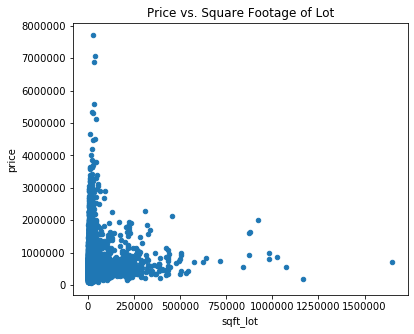

In [11]:
#sqft_lot
plot1 = pd.concat([df_train['price'], df_train['sqft_lot']], axis=1)
plot1.plot.scatter(x='sqft_lot', y='price', figsize=(6,5))
plt.title("Price vs. Square Footage of Lot");

### Relationship with categorical variables

##### Box plots of "recommended" variables against price

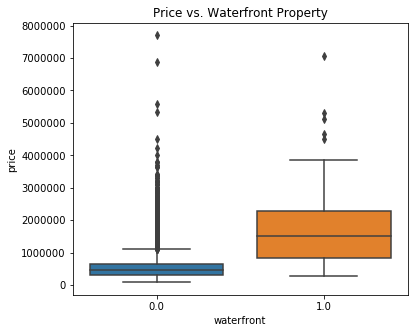

In [12]:
#waterfront
plot1 = pd.concat([df_train['price'], df_train['waterfront']], axis=1)
f, ax = plt.subplots(figsize=(6, 5))
fig = sns.boxplot(x='waterfront', y='price', data=plot1)
plt.title("Price vs. Waterfront Property");

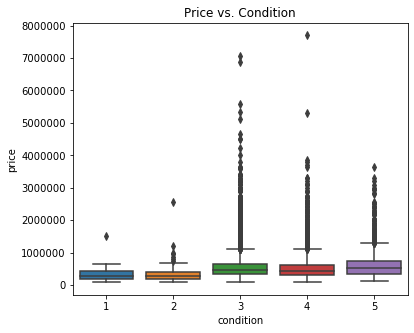

In [13]:
#condition
plot1 = pd.concat([df_train['price'], df_train['condition']], axis=1)
f, ax = plt.subplots(figsize=(6, 5))
fig = sns.boxplot(x='condition', y='price', data=plot1)
plt.title("Price vs. Condition");

In [14]:
len(df_train)

21597

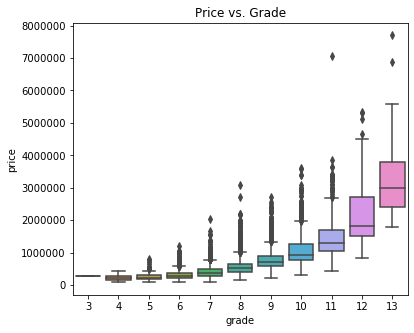

In [15]:
#grade
plot1 = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(6, 5))
fig = sns.boxplot(x='grade', y='price', data=plot1)
plt.title("Price vs. Grade");

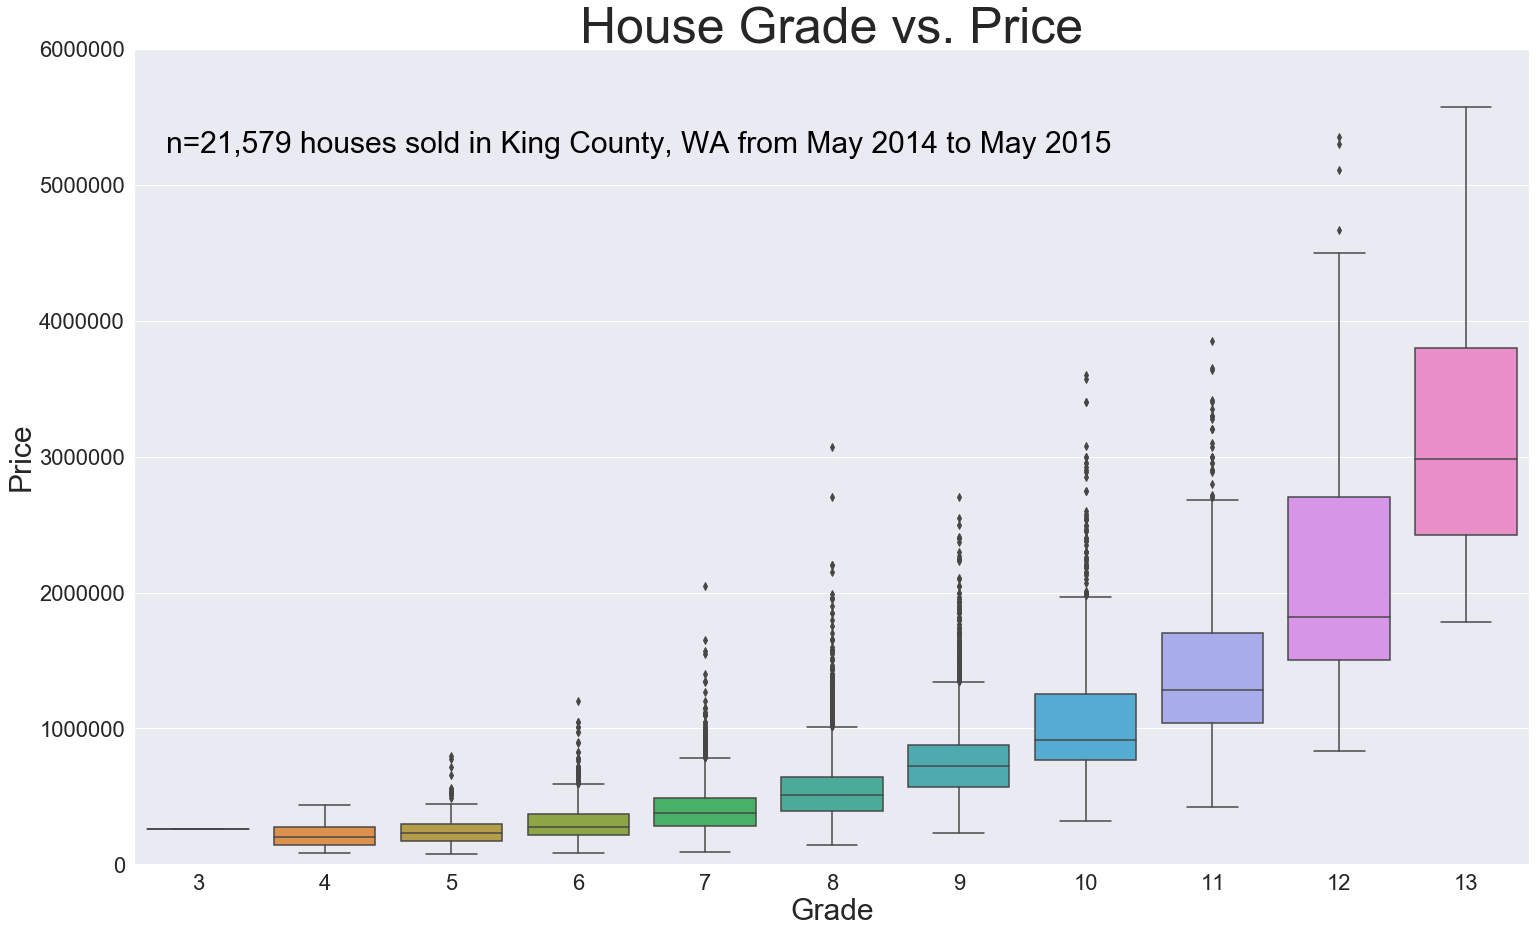

In [16]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="grade", y="price", data=df_train)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);

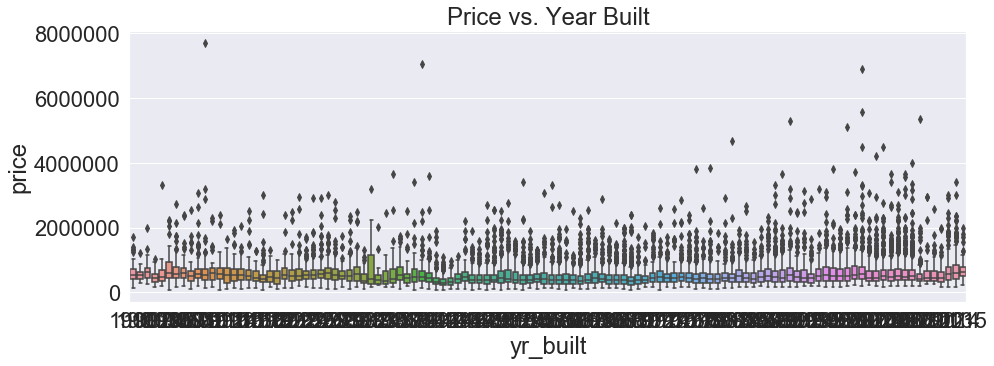

In [17]:
#yr_built
plot1 = pd.concat([df_train['price'], df_train['yr_built']], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x='yr_built', y='price', data=plot1)
plt.title("Price vs. Year Built");

>**Comment:** Too many bins. It would be more visually appealing to see price vs decade built.

### Examination of variable correlations

In [18]:
#Remove unwanted columns
drop_vars = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated',
             'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_train_mvp = df_train.drop(columns=drop_vars)

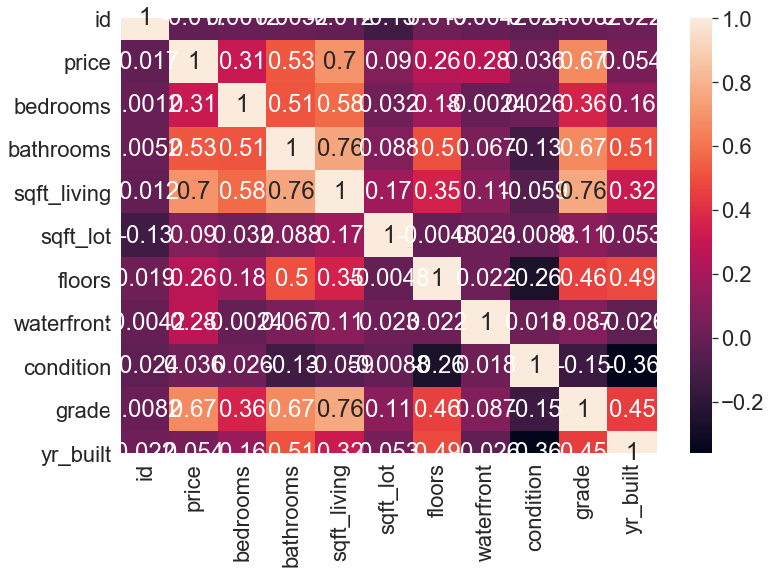

In [19]:
#correlation matrix of
corrmat = df_train_mvp.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, annot=True);

> **Comment:** Based on the variables above, it appears that 'sqft_living' numerical variable and the 'grade' categorical variable display some positive linear and positive exponential relationships with price of house.

## Location of a Church of Scientology as a feature

In [20]:
#locations pulled from scientology-seattle.org
church_of_scientology_mission = (47.818100, -122.315430)
church_of_scientology_washington = (47.622380, -122.361020)
church_of_scientology_life_improvement_center = (47.615060, -122.327580)

In [21]:
#function that finds the latitudinal distance from the church
def distance_to_scientology(latitudes, church):
    dist_scientology_washington = []
    for lat in latitudes:
        dist_scientology_washington.append(np.abs(lat - church[0]))
    return dist_scientology_washington

dist_lat_scientology_washington = distance_to_scientology(df_train['lat'], church_of_scientology_washington)
dist_lat_scientology_mission = distance_to_scientology(df_train['lat'], church_of_scientology_mission)
dist_lat_scientology_life = distance_to_scientology(df_train['lat'], church_of_scientology_life_improvement_center)

In [22]:
#function that finds the longitudinal distance from the church
def distance_to_scientology(longitudes, church):
    dist_scientology_washington = []
    for long in longitudes:
        dist_scientology_washington.append(np.abs(long - church[1]))
    return dist_scientology_washington

dist_lat_scientology_washington = distance_to_scientology(df_train['long'], church_of_scientology_washington)
dist_lat_scientology_mission = distance_to_scientology(df_train['long'], church_of_scientology_mission)
dist_lat_scientology_life = distance_to_scientology(df_train['long'], church_of_scientology_life_improvement_center)

In [23]:
#converting lists to Pandas DataFrames
df_lat_scientology_w = pd.DataFrame(dist_lat_scientology_washington)
df_lat_scientology_m = pd.DataFrame(dist_lat_scientology_mission)
df_lat_scientology_l = pd.DataFrame(dist_lat_scientology_life)

#creating new columns in the main dataframe of latitudinal differences and longitudinal differences 
#from house to churches
df_train['lat_scientology_w'] = df_lat_scientology_w
df_train['lat_scientology_m'] = df_lat_scientology_m
df_train['lat_scientology_l'] = df_lat_scientology_l

In [24]:
#function that identifies the distance between a point of interest and house 
def distance_to(point_of_interest):
    distance = df_train[['lat','long']].apply(lambda x: hs.haversine(x.tolist(), point_of_interest), axis=1)
    return distance

In [25]:
#creating new columns of distances from houses to point of interest
df_train['distance_to_scientology_m'] = distance_to(church_of_scientology_mission)
df_train['distance_to_scientology_w'] = distance_to(church_of_scientology_washington)
df_train['distance_to_scientology_l'] = distance_to(church_of_scientology_life_improvement_center)
df_train['closest_distance_to_scientology'] = df_train[['distance_to_scientology_m',
                                                        'distance_to_scientology_w',
                                                        'distance_to_scientology_l']].min(axis=1)

Distribution appears to deviate slightly from a normal distribution.
Displays a positive skewness.
Skewness: 0.8119816020278896
Kurtosis: 0.1550669496730026


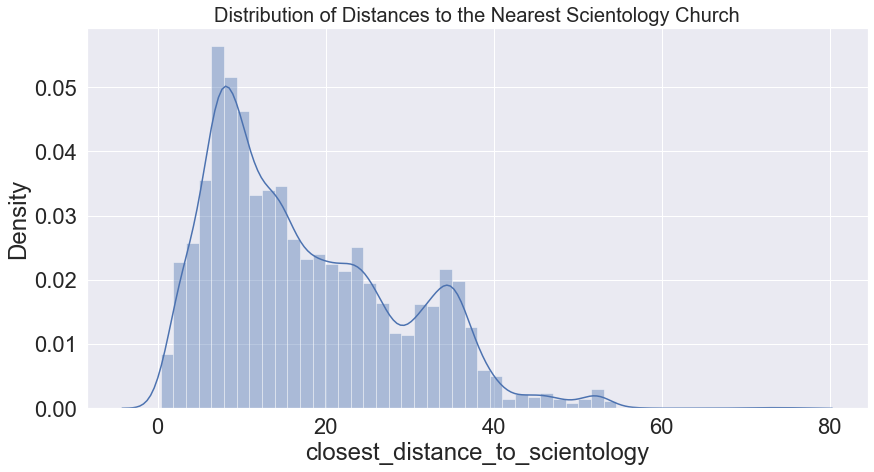

In [26]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['closest_distance_to_scientology'])
plt.title("Distribution of Distances to the Nearest Scientology Church", fontsize=20);
print("Distribution appears to deviate slightly from a normal distribution.")
print("Displays a positive skewness.")
print("Skewness:", df_train['closest_distance_to_scientology'].skew())
print("Kurtosis:", df_train['closest_distance_to_scientology'].kurt())

### Mapping the relationship between house price and distance to nearest scientology church

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


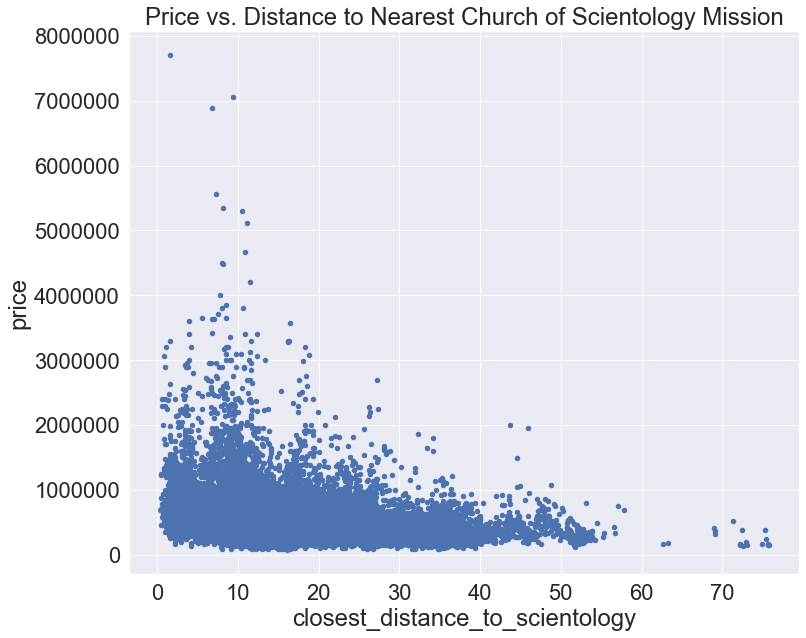

In [27]:
#church of scientology 
plot1 = pd.concat([df_train['price'], df_train['closest_distance_to_scientology']], axis=1)
plot1.plot.scatter(x='closest_distance_to_scientology', y='price', figsize=(12,10))
plt.title("Price vs. Distance to Nearest Church of Scientology Mission");

In [28]:
#creating categorical variable 'is_close' to signify houses that are less than 10 km from a church of scientology
df_train['is_close'] = np.where(df_train['closest_distance_to_scientology'] < 10, 1, 0)

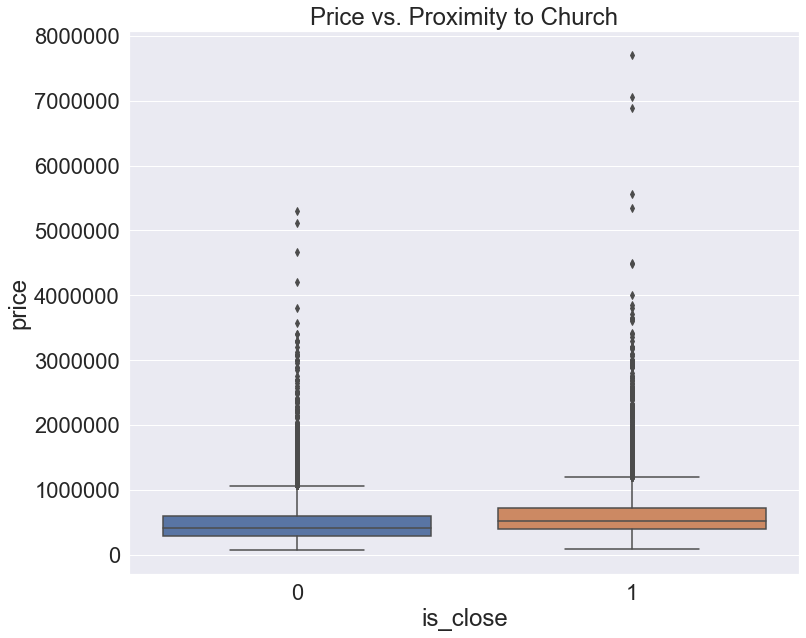

In [29]:
#visualizing the difference in house prices between houses less than 10km
#from a church versus houses greater than or equal to 10km from a church
plot1 = pd.concat([df_train['price'], df_train['is_close']], axis=1)
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='is_close', y='price', data=plot1)
plt.title("Price vs. Proximity to Church");

## Square footage of the home as a feature

Distribution appears to be normally distributed.
Displays a positive skewness.
Skewness: 0.8119816020278896
Kurtosis: 0.1550669496730026


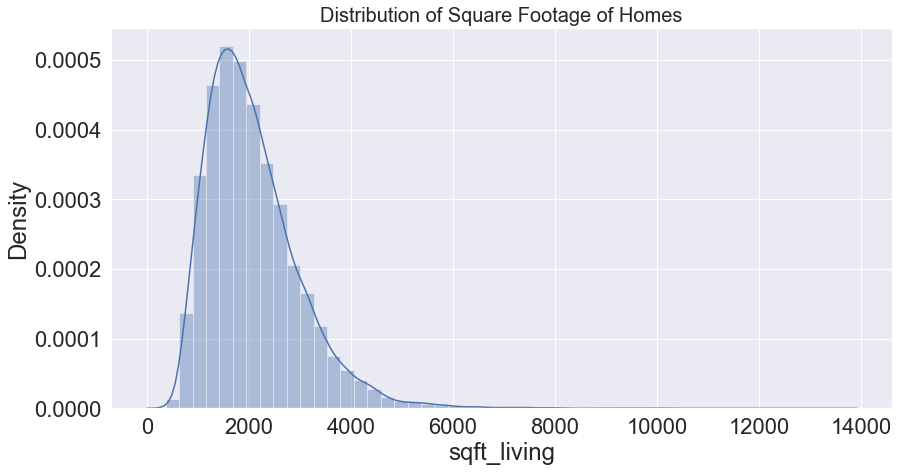

In [30]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['sqft_living'])
plt.title("Distribution of Square Footage of Homes", fontsize=20);
print("Distribution appears to be normally distributed.")
print("Displays a positive skewness.")
print("Skewness:", df_train['closest_distance_to_scientology'].skew())
print("Kurtosis:", df_train['closest_distance_to_scientology'].kurt())

>**Comment:** Appears there are a few very high-value homes. Might be helpful to remove outliers.

## Creation of first model

In [31]:
#Remove unwanted columns
drop_vars = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated',
             'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
             'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'waterfront',
             'condition', 'yr_built', 'lat_scientology_m', 'lat_scientology_l',
             'lat_scientology_w', 'distance_to_scientology_m', 'distance_to_scientology_w',
             'distance_to_scientology_l', 'id']
df_train_mvp = df_train.drop(columns=drop_vars)

In [32]:
drop_vars1 = ['grade', 'closest_distance_to_scientology', 'is_close']
df_train_mvp1 = df_train_mvp.drop(columns=drop_vars1)

In [33]:
# Fitting the actual model
outcome = 'price'
x_cols = ['sqft_living']
for col in x_cols:
    df_train_mvp1[col] = (df_train_mvp1[col] - df_train_mvp1[col].mean())/df_train_mvp1[col].std()
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train_mvp1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:30:01   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1780.543    303.445      0.000    5.37e+05    5.44e+05
sqft_living  2.579e+05   1780.584    144.819      0.000    2.54e+05    2.61e+05
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

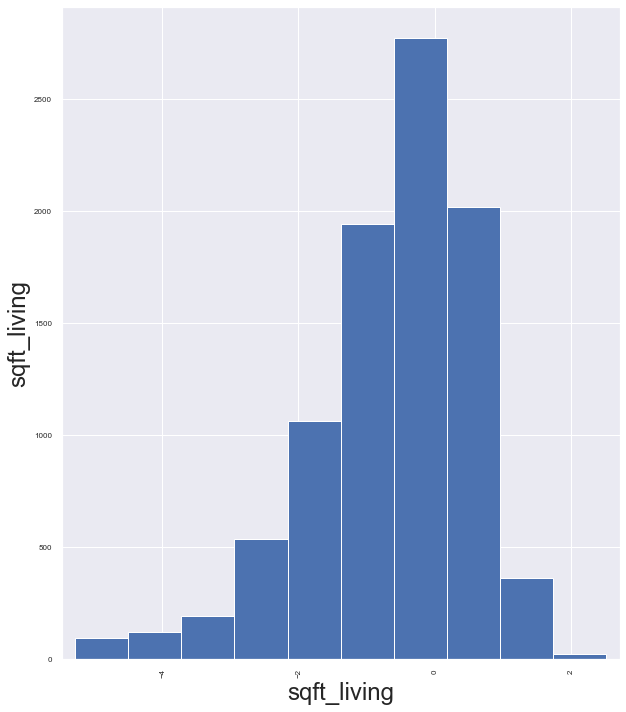

In [34]:
#natural log transformation for 'sqft_living'.
df_train_mvp1['sqft_living'] = df_train_mvp1['sqft_living'].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df_train_mvp1[['sqft_living']], figsize=(10,12));

In [35]:
#adding 'grade' to the equation
drop_vars2 = ['closest_distance_to_scientology', 'is_close']
df_train_mvp2 = df_train_mvp.drop(columns=drop_vars2)

In [36]:
#fitting model
outcome = 'price'
x_cols = ['sqft_living', 'grade']
for col in x_cols:
    df_train_mvp2[col] = (df_train_mvp2[col] - df_train_mvp2[col].mean())/df_train_mvp2[col].std()
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train_mvp2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:30:01   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1705.265    316.840      0.000    5.37e+05    5.44e+05
sqft_living   1.69e+05   2637.100     64.102      0.000    1.64e+05    1.74e+05
grade        1.164e+05   2637.100     44.155      0.000    1.11e+05    1.22e+05
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model R-squared value increased by 0.042

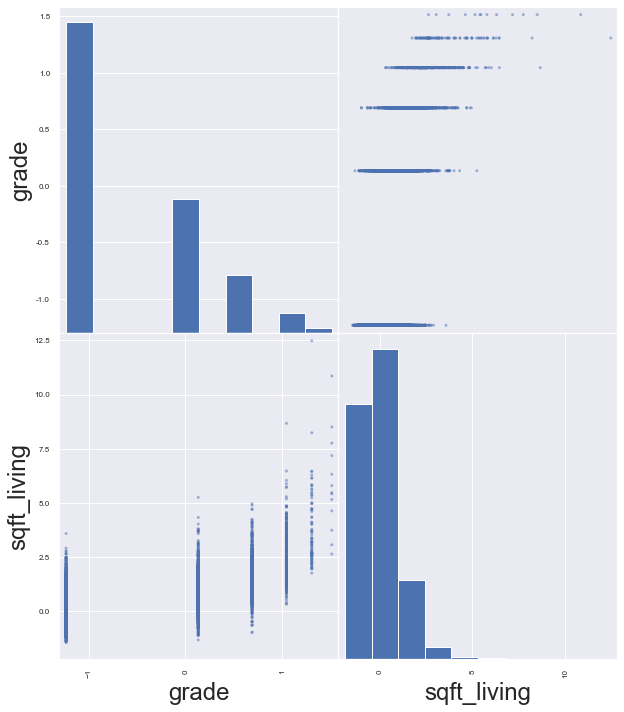

In [37]:
#natural log transformation for 'grade', which appears to be not normally distributed
df_train_mvp2['grade'] = df_train_mvp2['grade'].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df_train_mvp2[['grade', 'sqft_living']], figsize=(10,12));

In [38]:
#model after transforming the non-normal features
outcome = 'price'
x_cols = ['sqft_living', 'grade']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train_mvp2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     4603.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:30:03   Log-Likelihood:            -1.4549e+05
No. Observations:               10315   AIC:                         2.910e+05
Df Residuals:                   10312   BIC:                         2.910e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.475e+05   5721.247    113.182      0.000    6.36e+05    6.59e+05
sqft_living  2.259e+05   4080.736     55.358      0.000    2.18e+05    2.34e+05
grade         1.19e+05   5011.959     23.746      0.000    1.09e+05    1.29e+05
==============================================================================
Omnibus:                     6395.365   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155369.661
Skew:                           2.554   Prob(JB):                         0.00
Kurtosis:                      21.314   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model R-squared value decreased by 0.013

In [39]:
#adding 'closest_distance_to_scientology' to the equation
drop_vars3 = ['is_close']
df_train_mvp3 = df_train_mvp.drop(columns=drop_vars3)

In [40]:
#fitting model
outcome = 'price'
x_cols = ['sqft_living', 'grade', 'closest_distance_to_scientology']
for col in x_cols:
    df_train_mvp3[col] = (df_train_mvp3[col] - df_train_mvp3[col].mean())/df_train_mvp3[col].std()
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train_mvp3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                 1.259e+04
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:30:03   Log-Likelihood:            -2.9647e+05
No. Observations:               21597   AIC:                         5.930e+05
Df Residuals:                   21593   BIC:                         5.930e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        5.403e+05   1507.934    358.303      0.000    5.37e+05    5.43e+05
sqft_living                      1.882e+05   2344.984     80.262      0.000    1.84e+05    1.93e+05
grade                            1.019e+05   2339.410     43.576      0.000    9.74e+04    1.07e+05
closest_distance_to_scientology -1.177e+05   1516.406    -77.605      0.000   -1.21e+05   -1.15e+05
==============================================================================
Omnibus:                    19137.852   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1707718.818
Skew:                           3.874   Prob(JB):                         0.00
Kurtosis:                      45.868   Cond. No.                         2.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model R-squared value increased by 0.114

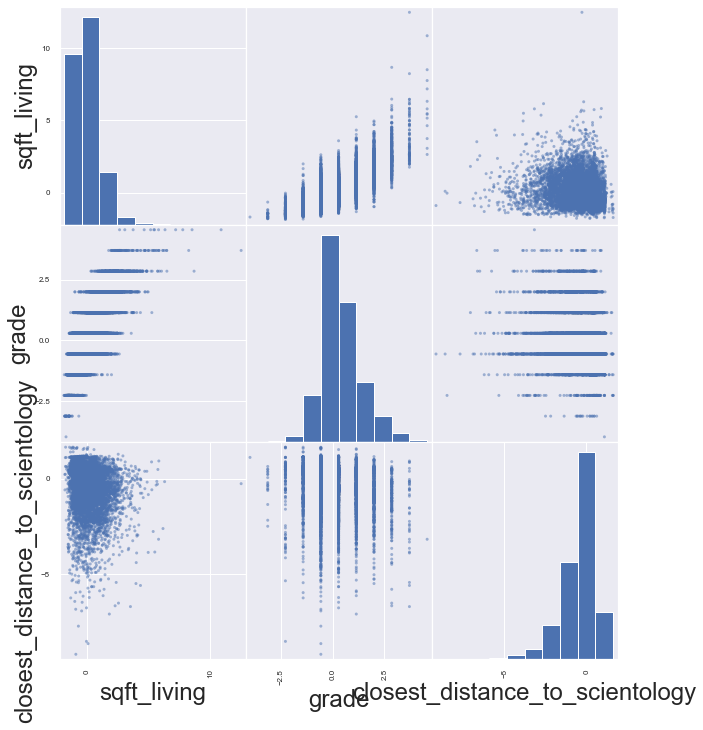

In [41]:
#natural log transformation for 'closest_distance_to_scientology', which appears to not be normally distributed.
df_train_mvp3['closest_distance_to_scientology'] = df_train_mvp3['closest_distance_to_scientology'].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df_train_mvp3[['sqft_living', 'grade', 'closest_distance_to_scientology']], figsize=(10,12));

In [42]:
#model after transforming the non-normal features
outcome = 'price'
x_cols = ['sqft_living', 'grade', 'closest_distance_to_scientology']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train_mvp3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     6782.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:30:08   Log-Likelihood:            -1.2064e+05
No. Observations:                9086   AIC:                         2.413e+05
Df Residuals:                    9082   BIC:                         2.413e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4.025e+05   1588.121    253.459      0.000    3.99e+05    4.06e+05
sqft_living                      1.279e+05   2421.648     52.827      0.000    1.23e+05    1.33e+05
grade                             8.43e+04   2361.640     35.693      0.000    7.97e+04    8.89e+04
closest_distance_to_scientology   -4.4e+04   1345.835    -32.694      0.000   -4.66e+04   -4.14e+04
==============================================================================
Omnibus:                     6055.165   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           221175.297
Skew:                           2.689   Prob(JB):                         0.00
Kurtosis:                      26.564   Cond. No.                         3.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking to ensure residuals are normally distributed

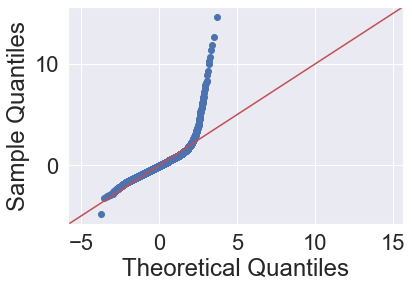

In [43]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

>**Comment:** The residuals appear to deviate on the upper boundaries. Our model should improve if we establish an upper threshold for house prices.

## Transformations and outliers
**Goals:** 
- Establish a threshold that defines an observation as an outlier.
- Normalize the data
- Address homoscedasticity
- Transformed categorial variables into dummy variables

In [45]:
#standardizing data
price_scaled = StandardScaler().fit_transform(df_train_mvp['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.25843051]
 [-1.25298626]
 [-1.25026413]
 [-1.247542  ]
 [-1.24618094]
 [-1.24481987]
 [-1.24209774]
 [-1.23937562]
 [-1.23937562]
 [-1.23529242]]

outer range (high) of the distribution:
[[10.75159884]
 [10.77882013]
 [11.24158191]
 [12.43931829]
 [12.95652264]
 [13.09262905]
 [13.69149724]
 [17.28470638]
 [17.74746817]
 [19.48963018]]


>**Comment:** The high range of the distribution have relatively larger outliers than the low range of the outliers. The largest high range prices on the distribution are over 10 standard deviations from the mean.

In [46]:
#removing rows with house prices over 3x standard deviations from mean
df_no_outlier = df_train_mvp[(np.abs(stats.zscore(df_train_mvp['price'])) < 3)]
print("I have removed all outliers that are more than three standard deviations outside of the mean. I have removed a total number of", len(df_train_mvp)-len(df_no_outlier), "rows.")

I have removed all outliers that are more than three standard deviations outside of the mean. I have removed a total number of 406 rows.


Distribution appears to closely represent a normal distribution.
Skewness: 1.3892777400843523
Kurtosis: 2.34772953928737


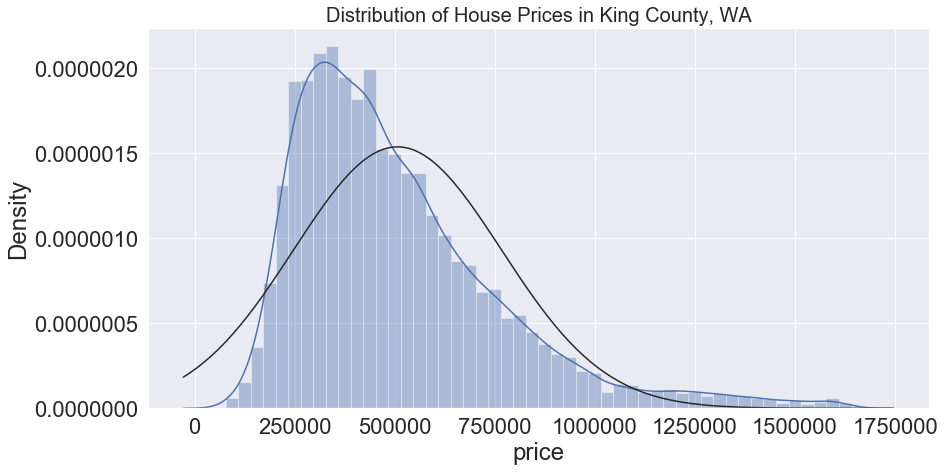

In [47]:
plt.figure(figsize=(14,7))
sns.distplot(df_no_outlier['price'], fit=norm)
plt.title("Distribution of House Prices in King County, WA", fontsize=20);
print("Distribution appears to closely represent a normal distribution.")
print("Skewness:", df_no_outlier['price'].skew())
print("Kurtosis:", df_no_outlier['price'].kurt())

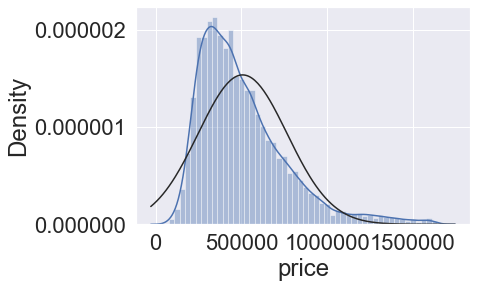

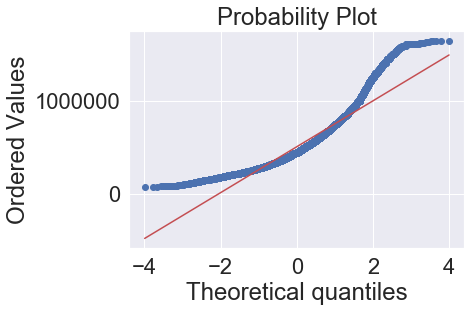

In [48]:
sns.distplot(df_no_outlier['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_no_outlier['price'], plot=plt)

In [49]:
#applying log transformation
df_no_outlier['price_log'] = np.log(df_no_outlier['price'])

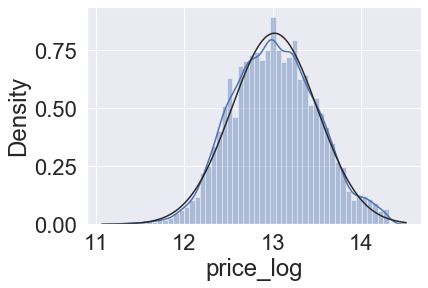

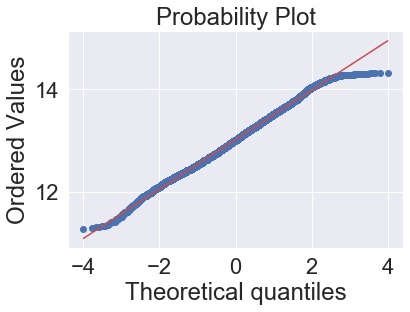

In [50]:
#transformed histogram and normal probability plot
sns.distplot(df_no_outlier['price_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_no_outlier['price_log'], plot=plt)

##### Let's look at 'sqft_living' and potentially make a transformation

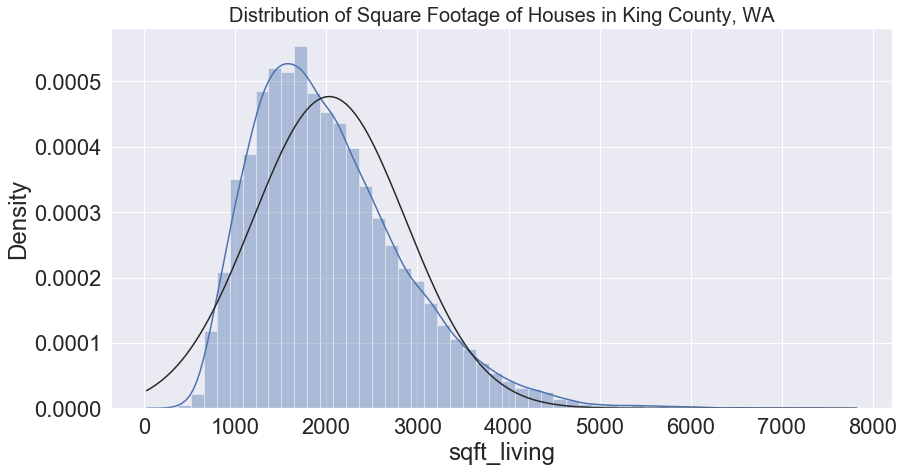

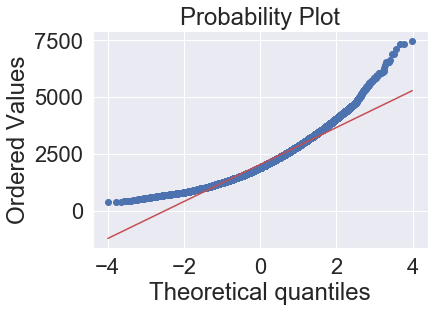

In [51]:
#histogram and normal probability plot
plt.figure(figsize=(14,7))
sns.distplot(df_no_outlier['sqft_living'], fit=norm)
plt.title("Distribution of Square Footage of Houses in King County, WA", fontsize=20);
fig = plt.figure()
res = stats.probplot(df_no_outlier['sqft_living'], plot=plt)

In [52]:
#log transformation to 'sqft_living'
df_no_outlier['sqft_living_log'] = np.log(df_no_outlier['sqft_living'])

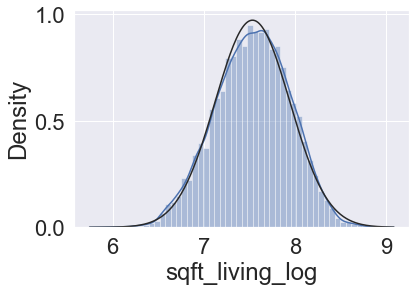

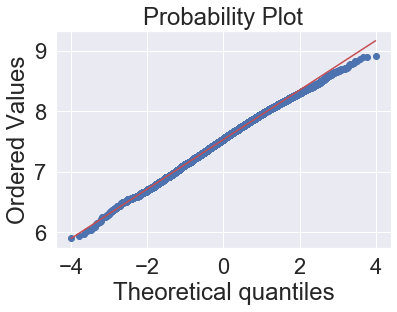

In [53]:
#transformed histogram and normal probability plot
sns.distplot(df_no_outlier['sqft_living_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_no_outlier['sqft_living_log'], plot=plt)

##### Let's look at 'closest_distance_to_scientology' and potentially make a transformation

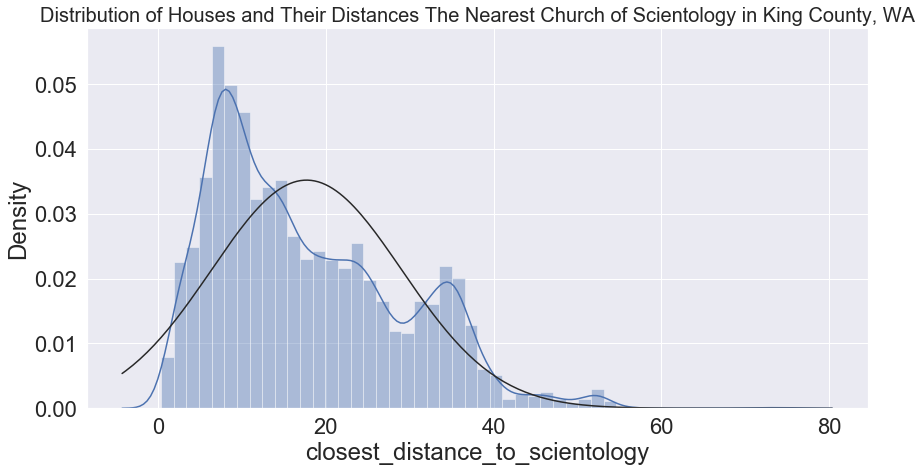

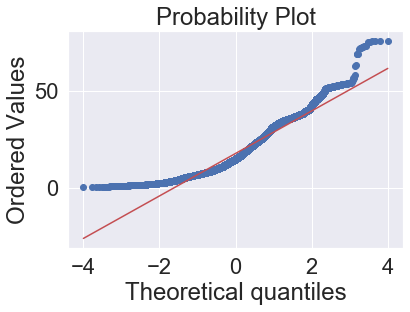

In [54]:
#histogram and normal probability plot
plt.figure(figsize=(14,7))
sns.distplot(df_no_outlier['closest_distance_to_scientology'], fit=norm)
plt.title("Distribution of Houses and Their Distances The Nearest Church of Scientology in King County, WA", fontsize=20);
fig = plt.figure()
res = stats.probplot(df_no_outlier['closest_distance_to_scientology'], plot=plt)

In [55]:
#data transformation
df_no_outlier['closest_distance_to_scientology_log'] = np.log(df_no_outlier['closest_distance_to_scientology'])

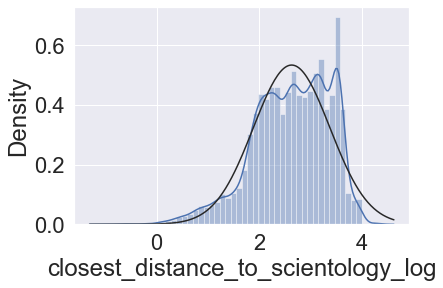

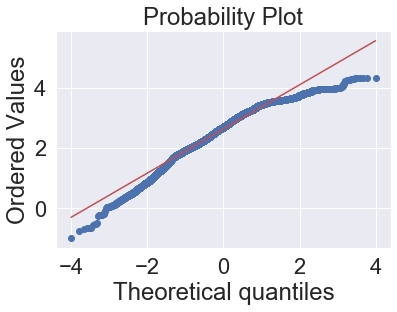

In [56]:
#transformed histogram and normal probability plot
sns.distplot(df_no_outlier['closest_distance_to_scientology_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_no_outlier['closest_distance_to_scientology_log'], plot=plt)

##### Visual test for homoscedasticity

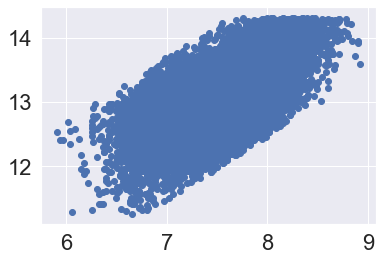

In [57]:
#scatter plot
plt.scatter(df_no_outlier['sqft_living_log'], df_no_outlier['price_log']);

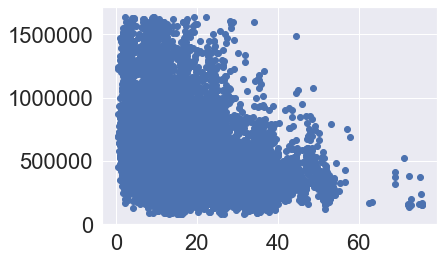

In [58]:
#scatter plot
plt.scatter(df_no_outlier['closest_distance_to_scientology'], df_no_outlier['price']);

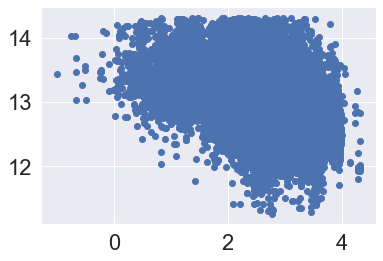

In [59]:
#scatter plot
plt.scatter(df_no_outlier['closest_distance_to_scientology_log'], df_no_outlier['price_log']);

>**Comment:** The 'closest_distance_to_scientology' still doesn't appear that it follows all of the assumptions of normality.

##### Dummy variables

In [60]:
# Convert categorical variables (df_no_outlier[['grade', 'is_close']]) into dummy variables
df_no_outlier = pd.get_dummies(df_no_outlier)